### Importing the basic libraries that are used to perform analysis on python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Reading the data

In [2]:
soft_drink_full = pd.read_csv('Soft_drink.csv')
soft_drink_full['DATE'] = pd.to_datetime(soft_drink_full['DATE'])

### Lets look at the first few rows of the data

In [3]:
soft_drink_full.head()

,DATE,SALES
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221


## `Set the DATE column as the index.`


In [4]:
soft_drink_full = soft_drink_full.set_index('DATE')

In [5]:
soft_drink_full.head()

,SALES
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


### We will be using data till 2017 to train and forecasting model and will be using the model to forecast the sales for 2018 onwards.

In [6]:
train = soft_drink_full.loc[:'2018-01-01',:]
test = soft_drink_full.loc['2017-12-01':,:]

In [7]:
train.head()

,SALES
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


## Making the time plot of the train dataset to visualise it


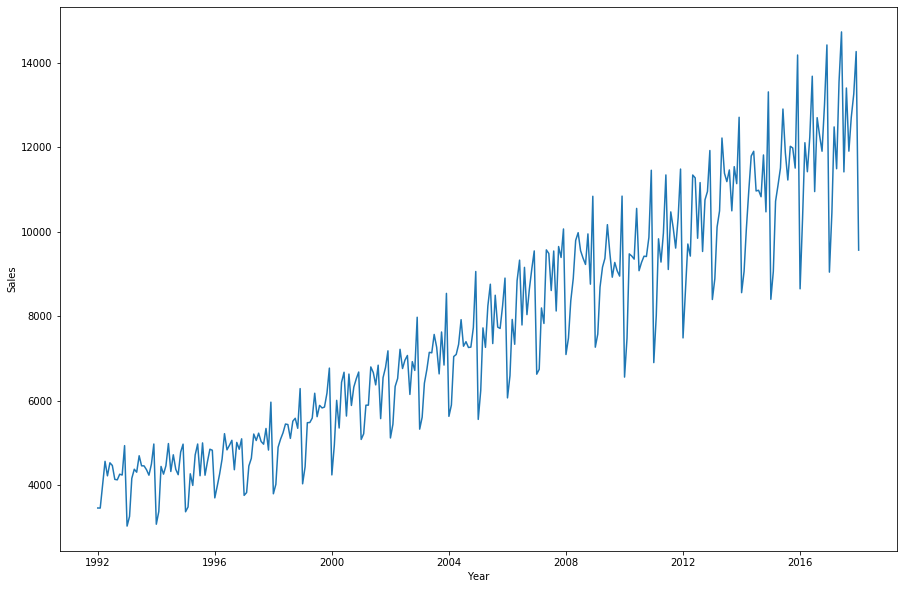

In [8]:
plt.figure(figsize=[15,10])
plt.xlabel('Year')
plt.ylabel('Sales')
plt.plot(train)

#### Question - 1: Write your observations about cold drink sales in detail.



### <font color='Blue'> The above plot represents the sales volume (variable of interest) of Coca-Cola drink and is against the time period starting from 1992 to 2017. </font>
### <font color='Blue'> This graph is a Time Series Analysis, A time series is a sequence of observations which are recorded in order of time at successive equally spaced points.</font>
### <font color='Blue'> The sales trend of coke is increasing in a from 4000 to 14000 between 1992 and 2017.</font>
### <font color='Blue'> There is a upward trend in the graph where we can see that there is icremental movement of sales each year.</font>
### <font color='Blue'> There is some repeated ups and downs pattern in a year and this is happening each year, we can see there are peak falls at the start of each year, this will be due to seasonality as well.</font>


In [9]:
# Run this cell and don't make any changes
for_sma = train.copy()

First, Let's use a simple forecasting technique. Implementing the simple moving average forecasting model with a rolling window of 12 months

In [10]:
for_sma['SMA_12'] = for_sma['SALES'].rolling(window = 12).mean()
for_sma.tail(1)

,SALES,SMA_12
DATE,,
2018-01-01,9564,12435.416667


#### Question - 2: According to the results obtained in the previous question, what can you infer about the results obtained? Is the moving average model working fine? 

### <font color='Blue'> In the above result of code cell we can see that the simple moving average is calculated for a 12 month window </font>
### <font color='Blue'> Simple moving average is help us estimate the future based on near past, it is the constant average in a graph which has fluctuating averages. </font>
### <font color='Blue'> Here we can see that the SMA for past is 12 months is 12435.416 and the the sales of Jan 2018 is 9564</font>
### <font color='Blue'> The lesser sales helps us to understand the downward fluctuation present in the graph . This also means that the sales of Coke is lower than average of previous year at the start of 2018.</font>
### <font color='Blue'> Also, from the graph we know that the sales have a uplift in the later months, therefore the Sales in Jan month will be lesser</font>

Now lets build an Auto-Regressive models

#### Question-3: Before we moving ahead building an Auto Regressive model, we would be required to remove trend and seasonality from the give time series. Answer, why does Trend and seasonality affect Auto regressive models adversely and why is it required to be removed before building a ARIMA model?


### <font color='Blue'> Trend and Seasonality results in varying the mean and changing variance over time respectively.</font>
### <font color='Blue'> Removing the Seasonality help in understanding better relationship between the forecasted sales and actual sales.Removing the Trend helps us to design the model in a easier way and helps in better performance of the model, otherwise the time series will not fit to model analysis especially regression</font>
### <font color='Blue'> Statistical values like mean , variance and co-variance will remain the same after removal of trend and seasonality</font>
### <font color='Blue'> There will be a horizontal trend and will flatten the curve as well</font>
### <font color='Blue'> The accuracy of of predictions will be better after removal of trend and seasonality</font>


## Lets check the rolling statistics 

In [11]:
train = train.iloc[:-1,:]
from matplotlib.pylab import rcParams
def rolling_means(time_series):
    rolmean  =  time_series.rolling(window = 12).mean()   
    rolstd  =  time_series.rolling(window = 12).std()

    #Plot rolling statistics

    rcParams['figure.figsize']  =  10, 5 

    orig  =  plt.plot(time_series, color = 'blue', label = 'Original')
    mean  =  plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    std  =  plt.plot(rolstd, color = 'black', label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block = False)

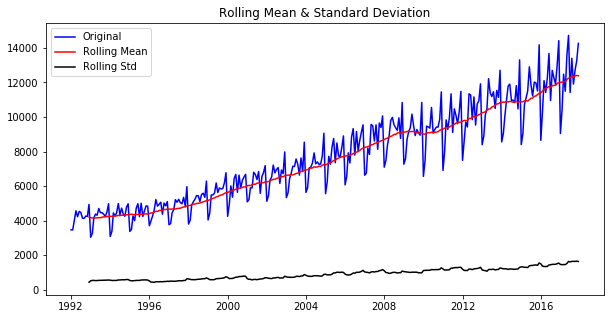

In [12]:
rolling_means(train)

#### Question-4: Explain the significance of above step. What can we infre from the above results?

### <font color='Blue'> The above results of code cell will helps us understanding the trend and seasonality of the Time series data using Rolling Mean and Rolling Standard Deviation in the Train Data</font>

### <font color='Blue'> Rolling Means helps us in following ways :</font>
#### <font color='Blue'> 1. Help us to determine the mean of data present in the trend in Time Series Data.</font>
#### <font color='Blue'> 2. Due to presence of trend , the mean also will not be constant for this data , Therefore it would end up in wrong predicting accuracy of the model, that is forecasting accurate sales.</font>
#### <font color='Blue'> 3. This is the reason a rolling mean is calculated, to handle the fluctuations as it analyses data points by taking the mean of different data subsets of the whole data.</font>
#### <font color='Blue'> 4. Rolling mean helps us in easy interpretation in understanding of the data.</font>
#### <font color='Blue'> 5. We can say from the above graph that the there is an upward trend of mean of sales every year, however there was a small dip in 2010 but otherwise the sales have increased every year.
</font>



### <font color='Blue'> Rolling Standard Deviation helps us in following ways :</font>
#### <font color='Blue'> 1. Help us to determine the variation of sales data from the mean present in the seasonality on Time Series Data.</font>
#### <font color='Blue'> 2. It will help in understanding better prediction of future sales and will define clear relation in actual and forecasted sales.</font>
#### <font color='Blue'> 3. There is a upward trend in the Seasonality or Standard Deviation Graph as well.</font>


## Perform ADF test to check the stationarity of the data

In [15]:

def adf_test(time_series):
    from statsmodels.tsa.stattools import adfuller
    dftest  =  adfuller(time_series['SALES'], autolag = 'AIC')

    dfoutput  =  round(pd.Series(dftest[0:4], index = ['Test Statistic','p-value','#Lags Used','Number of Observations Used']),4)
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]  =  value
    
    print('Results of Dickey Fuller Test:')    
    print(dfoutput)

In [16]:
adf_test(train)

Results of Dickey Fuller Test:
Test Statistic                   1.352700
p-value                          0.996900
#Lags Used                      14.000000
Number of Observations Used    297.000000
Critical Value (1%)             -3.452561
Critical Value (5%)             -2.871321
Critical Value (10%)            -2.571982
dtype: float64


## Question-5: What is the null hypothesis of the ADF test? What can you infer from the results of this test?




### <font color='Blue'> ADF Test is the test done for checking any kind of Statistial Hypothesis from the data</font>

### <font color='Blue'> The null hypothesis and alternate hypothesis are below  :</font>
#### <font color='Blue'> Null Hypothesis (H0): The time-series has trend and seasonality which over here is ADF test statictics > Critical value(1%,5%,10%) also (P value > 0.05)</font>
#### <font color='Blue'> Alternate Hypothesis (H1):The time-series does not have trend and seasonality which over here is if ADF test statistics ≤ Critical value(1%,5%,10%) also (P value <= 0.05). </font>

### <font color='Blue'>From The result of the above code cell, we can clearly see that p-value is 0.99 which is greater than 0.05, therefore the Statistial Value > Critical value</font>
### <font color='Blue'>Null Hypothesis is ACCEPTED</font>

### <font color='Blue'>From above we can infer that Trend and Seasonality is persent in the data also this kind of data needs treatment</font>


# Log Transformation and Differencing

Here we will remove the trend and seasonality from our data.

In [23]:
log_trans = np.log(train['SALES'])

In [24]:
diff_data = pd.DataFrame(log_trans - log_trans.shift()).dropna()

In [25]:
diff_data.head()

,SALES
DATE,
1992-02-01,-0.000289
1992-03-01,0.146104
1992-04-01,0.131405
1992-05-01,-0.078127
1992-06-01,0.070429


## Question-6: Previously we have created a functions for plotting rolling mean and standard deviation. Use the same function and check the plot of `diff_data`

### <font color='Blue'> Code in below cell</font>


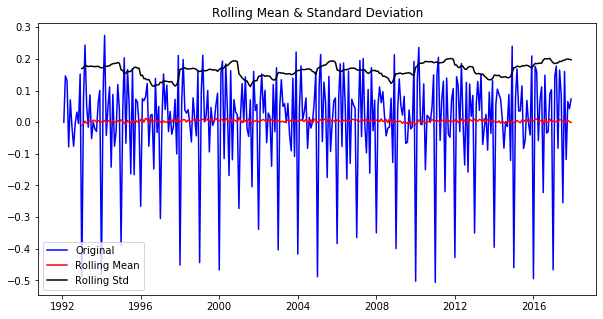

In [26]:
rolling_means(diff_data)

## Question-7: Previously we have created a functions for perfroming adf_test. Use the same function and check the adf_test results for `diff_data`

### <font color='Blue'> Code in below cell</font>


In [27]:
adf_test(diff_data)

Results of Dickey Fuller Test:
Test Statistic                  -5.654400
p-value                          0.000000
#Lags Used                      13.000000
Number of Observations Used    297.000000
Critical Value (1%)             -3.452561
Critical Value (5%)             -2.871321
Critical Value (10%)            -2.571982
dtype: float64


## Question-8: Is the data stationary now? Explain the results here

### <font color='Blue'> Yes, the data is stationery now.</font>
### <font color='Blue'> ADF test is conduted again after the removal of trend and seasonality form the data</font>
### <font color='Blue'> We can clearly see that the P-value is '0' now and the ADF Test Statistical value(-5.6) is below the critical value (1%,5%,10%).</font>
### <font color='Blue'>If we connect to the previous question about Null Hypothesis, it will be REJECTED in this case and we can say that there isno trend and seasonality in now.</font>
### <font color='Blue'>Stationary Data means  one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time</font>


## Now, before performing time series forecasting lets plot the acf and pacf

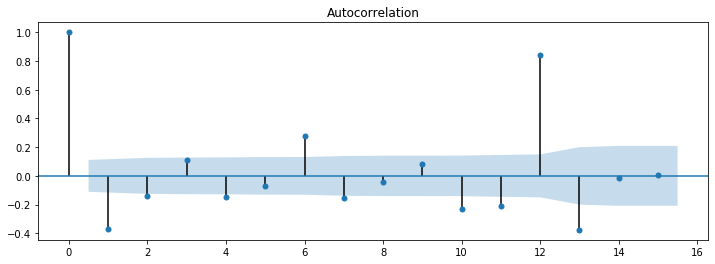

In [20]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12,4))
plot_acf(diff_data, ax=plt.gca(), lags = 15)
plt.show()

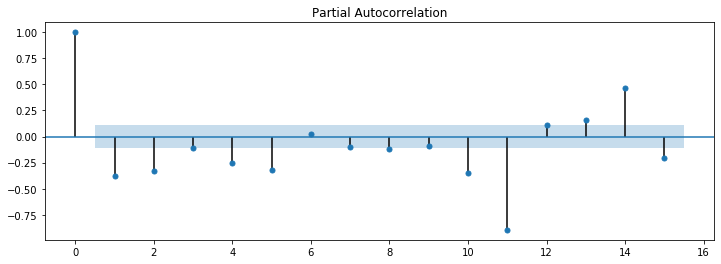

In [21]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(12,4))
plot_pacf(diff_data, ax=plt.gca(), lags = 15)
plt.show()

## Question-9: What can you infer from the above plots?

### <font color='Blue'> Form the above plot we can see the Autocorelation - ACF and Partial Autocorelation- PACF have been plotted on the data which had removed Trend and Seasonality</font>

### <font color='Blue'> Inferences for Autocorelation ACF is below </font>

#### <font color='Blue'> 1. Auto correlation is the correlation of a time series with its own past and future values,it is also sometimes called lagged correlation or serial correlation, which is the correlation between members of a series of numbers arranged in time. Positive auto correlation might be considered a specific form of persistence, a tendency for a system to remain in the same state from one observation to the next. Autocorrelation refers to the process of capturing the relationship between the observations yt at time point t and yt−k at time point k time before time t. </font>

#### <font color='Blue'>2. There is a 15 period lag used here . We can see the AutoCorelation is 1 at lag 0, as the data is correlated with itself. We can see that at a lag of 1, there is a negative auto-correlation of - 0.40 and is crosssing the significant level. The pattern indicates an autoregressive term of order 12 as it is the highest(0.8). We can see that the ACF correlation are between yt and its 0,1,6,10,12,13 period lags.</font>


Y(t-0) has a strong positive correlation.

Y(t-1) has a strong negative correlation.

Y(t-6) has a strong positive correlation.

Y(t-10) has a strong negative correlation.

Y(t-12) has a strong positive correlation.

Y(t-13) has a strong negative correlation.


### <font color='Blue'> Inferences for Partial Autocorelation PACF is below </font>

#### <font color='Blue'> 1. A Partial Autocorrelation is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed. Partial auto-correlation function captures the direct relationships between an observation and its lag. We can evaluate the PACF between seasonally apart values and find the direct impact of the seasonality factor in the change of values.</font>

#### <font color='Blue'> In the above analysis, we have used 15 period lag. Partial Auto-correlation is 1 at lag 0, as the data is correlated with itself.</font>
#### <font color='Blue'> We can see that the PACF correlation are between yt and its 0, 1, 2, 4, 5, 10, 11, 13, 14, 15 period lags.</font>

Y(t-0) has a strong positive correlation.

Y(t-1) has a strong negative correlation.

Y(t-2) has a strong negative correlation.

Y(t-4) has a strong negative correlation.

Y(t-5) has a strong negative correlation.

Y(t-10) has a strong negative correlation.

Y(t-11) has a strong negative correlation.

Y(t-13) has a strong positive correlation.

Y(t-14) has a strong positive correlation.

Y(t-15) has a strong negative correlation.

#### <font color='Blue'> We should select p=11 as it is the highest lag where partial auto-correlation is significantly high.
We will build a regression model from the independent variables . </font>

### Performing log transformation and differencing on the test dataset

In [28]:
log_test = np.log(test)
diff_test = pd.DataFrame(log_test - log_test.shift()).dropna()

Now let's build an AR Model using the differenced data

In [29]:
from statsmodels.tsa.ar_model import AR
model = AR(diff_data)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

Lag: 16
Coefficients: const        0.019667
L1.SALES    -1.085123
L2.SALES    -0.975021
L3.SALES    -0.497694
L4.SALES    -0.519837
L5.SALES    -0.450582
L6.SALES    -0.411844
L7.SALES    -0.434022
L8.SALES    -0.426627
L9.SALES    -0.420957
L10.SALES   -0.455187
L11.SALES   -0.401415
L12.SALES    0.531180
L13.SALES    0.613058
L14.SALES    0.538473
L15.SALES    0.060629
L16.SALES    0.081035
dtype: float64


C:\Users\My-PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


## Make predictions (ONLY FOR THE NEXT 12 MONTHS )

## Using the model(trained in the previous step) to predict for next 12 months.

In [30]:
predictions = model_fit.predict(start=len(diff_data), end=len(diff_data)+len(diff_test)-1, dynamic=False)
predictions.head()

for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], diff_test.iloc[i]))
    

predicted=-0.391452, expected=-0.399803
predicted=0.126435, expected=0.085241
predicted=0.132359, expected=0.197015
predicted=-0.027488, expected=-0.062129
predicted=0.150793, expected=0.170732
predicted=0.053753, expected=0.030990
predicted=-0.210407, expected=-0.142990
predicted=0.139151, expected=0.120382
predicted=-0.120877, expected=-0.139874
predicted=0.078389, expected=0.115522
predicted=0.045330, expected=0.018514
predicted=0.050431, expected=0.089689
predicted=-0.364571, expected=-0.369173


## Plotting the AR MODEL 

Plotting AR model


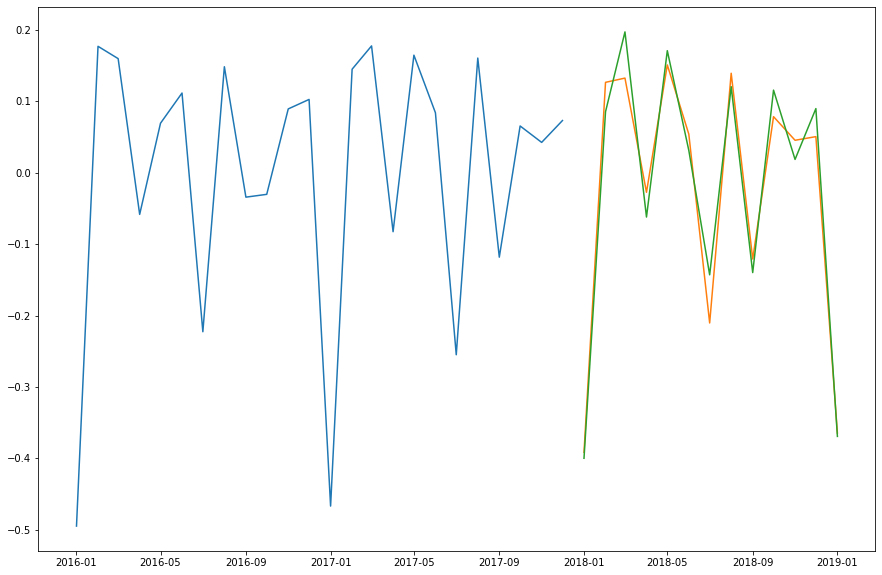

In [31]:
plt.figure(figsize = (15,10))
plt.plot(diff_data[-24:])
plt.plot(predictions)
plt.plot(diff_test)
print('Plotting AR model')

In [32]:
diff_test = diff_test['SALES']

## Evaluate the accuracy of the model using metrics such as MSE and MAPE

In [33]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(predictions, diff_test)

39.38713743710823

In [34]:
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
error = mean_squared_error(predictions, diff_test)
print('Test MSE: %.3f' % error)

Test MSE: 0.001


## Now let's build a MA Mode using the differenced data: Use order = (0,0,1)

In [35]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(diff_data,order=(0,0,1))
results_MA = model.fit()
print('Lag: %s' % results_MA.k_ar)
print('Coefficients: %s' % results_MA.params)

C:\Users\My-PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Lag: 0
Coefficients: const          0.003835
ma.L1.SALES   -0.963916
dtype: float64


## Make predictions (ONLY FOR THE NEXT 12 MONTHS )

## Using the model(trained in the previous step) to predict for next 12 months.

In [36]:
predictions_ma = results_MA.predict(start=len(diff_data), end=len(diff_data)+len(diff_test)-1, dynamic=False)
predictions_ma.head()

for i in range(len(predictions_ma)):
    print('predicted=%f, expected=%f' % (predictions_ma[i], diff_test.iloc[i]))

predicted=-0.101773, expected=-0.399803
predicted=0.003835, expected=0.085241
predicted=0.003835, expected=0.197015
predicted=0.003835, expected=-0.062129
predicted=0.003835, expected=0.170732
predicted=0.003835, expected=0.030990
predicted=0.003835, expected=-0.142990
predicted=0.003835, expected=0.120382
predicted=0.003835, expected=-0.139874
predicted=0.003835, expected=0.115522
predicted=0.003835, expected=0.018514
predicted=0.003835, expected=0.089689
predicted=0.003835, expected=-0.369173


## Plotting the MA Model

Plotting AR model


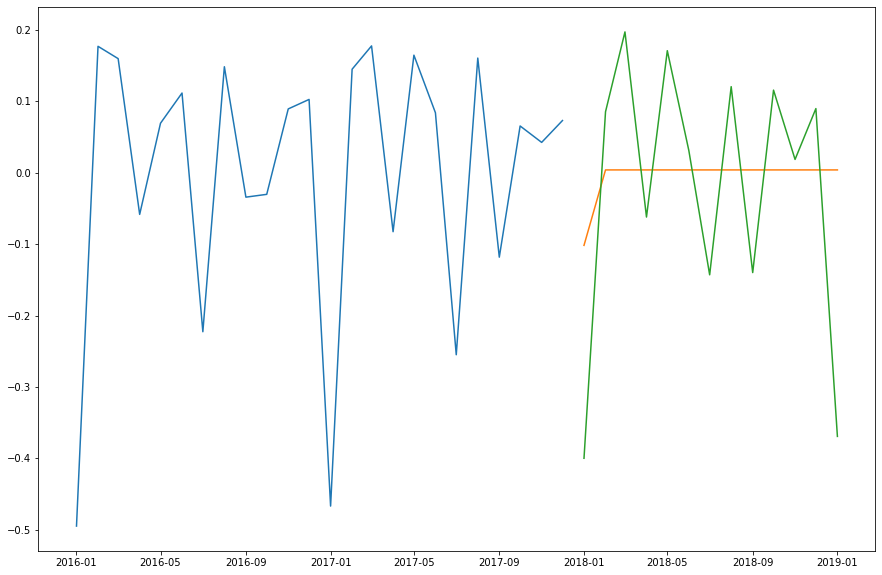

In [37]:
plt.figure(figsize = (15,10))
plt.plot(diff_data[-24:])
plt.plot(predictions_ma)
plt.plot(diff_test)
print('Plotting AR model')

## Evaluate the accuracy of the MA model using metrics such as MSE and MAPE

In [38]:
mean_absolute_percentage_error(predictions_ma, diff_test)

3084.9183841580407

In [39]:
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
error = mean_squared_error(predictions_ma, diff_test)
print('Test MSE: %.3f' % error)

Test MSE: 0.029


## Using the value p as 11 and q as 2, building a ARMA model.

In [40]:
from statsmodels.tsa.arima_model import ARMA
model = ARMA(diff_data,order=(11,2))
model_arma = model.fit(transparams=False)
print('Lag: %s' % model_arma.k_ar)
print('Coefficients: %s' % model_arma.params)

C:\Users\My-PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Lag: 11
Coefficients: const           0.003575
ar.L1.SALES    -0.962353
ar.L2.SALES    -0.974380
ar.L3.SALES    -0.930946
ar.L4.SALES    -0.971868
ar.L5.SALES    -0.940749
ar.L6.SALES    -0.909516
ar.L7.SALES    -0.962166
ar.L8.SALES    -0.919319
ar.L9.SALES    -0.933560
ar.L10.SALES   -0.980167
ar.L11.SALES   -0.899704
ma.L1.SALES    -0.235809
ma.L2.SALES     0.323052
dtype: float64


C:\Users\My-PC\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


## Making predictions using ARMA model

In [41]:
predictions_arma = model_arma.predict(start=len(diff_data), end=len(diff_data)+len(diff_test)-1, dynamic=False)
predictions_arma.head()

for i in range(len(predictions_arma)):
    print('predicted=%f, expected=%f' % (predictions_arma[i], diff_test.iloc[i]))

predicted=-0.399507, expected=-0.399803
predicted=0.143014, expected=0.085241
predicted=0.144186, expected=0.197015
predicted=-0.061574, expected=-0.062129
predicted=0.177897, expected=0.170732
predicted=0.047423, expected=0.030990
predicted=-0.230804, expected=-0.142990
predicted=0.165238, expected=0.120382
predicted=-0.122455, expected=-0.139874
predicted=0.048071, expected=0.115522
predicted=0.096923, expected=0.018514
predicted=-0.001918, expected=0.089689
predicted=-0.344854, expected=-0.369173


Plotting ARMA model


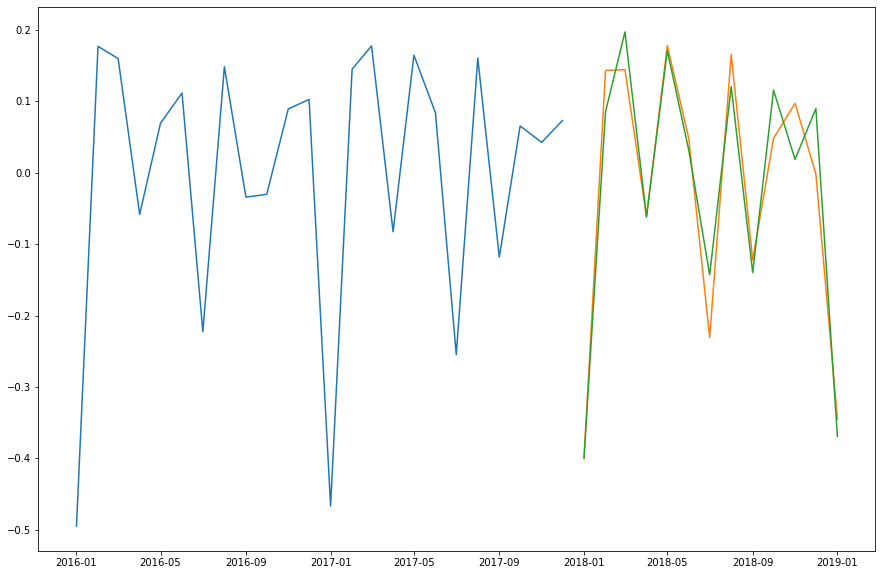

In [42]:
plt.figure(figsize = (15,10))
plt.plot(diff_data[-24:])
plt.plot(predictions_arma)
plt.plot(diff_test)
print('Plotting ARMA model')

## Evaluate the accuracy of the ARMA model using metrics such as MSE and MAPE`

In [43]:
mean_absolute_percentage_error(predictions_arma, diff_test)

400.0249621002543

In [44]:
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
error = mean_squared_error(predictions_arma, diff_test)
print('Test MSE: %.3f' % error)

Test MSE: 0.003


## Question-10: Compare AR,MA and ARMA models using the evaluation metrics and decide the best performing model.

### <font color='Blue'> Auto-correlation - ACF and Partial Auto-correlation PACF function plot is done for Coca-cola sales data. </font>

### <font color='Blue'> Below is the comparison of AR,MA, ARMA: </font>

### <font color='Blue'> AR as below </font>
#### <font color='Blue'> MAPE : 39.38</font>
#### <font color='Blue'> MSE : 0.01</font>
   
### <font color='Blue'> MA as below </font>
#### <font color='Blue'> MAPE : 3084.917</font>
#### <font color='Blue'> MSE : 0.029</font>


### <font color='Blue'> ARMA as below : </font>
#### <font color='Blue'> MAPE : 400.047</font>
#### <font color='Blue'> MSE : 0.003</font>


#### <font color='Blue'> MSE stands for mean squared error. It is the absolute number of how much your predicted results deviated from the actual number. Form the above numbers we can see that the MSE for AR is the least, we can say that the values of this model are close to its central means and is not skewed.It has least number of errors</font>

#### <font color='Blue'>MAPE is the short for Mean Absolute Percentage Error. The mean absolute percentage error (MAPE) is a statistical measure of how accurate a forecast system is. It measures this accuracy as a percentage, and can be calculated as the average absolute percent error for each time period minus actual values divided by actual value. MAPE is the sum of the individual absolute errors divided by the demand variable, A model having high percentage of absolute average error should be avoided.We can see that MA has the highest MAPE whereas AR has the least value of MAPE. </font>


### <font color='Blue'>  Thus, AR is the best performing model, as its MSE and MAPE are lower than the others. Hence AR model can be used for sales forecasting of COKE.</font>
